# Figure 1
#### Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

Composites of geopotential height, SOM node 4, and relationship between node 4 and PC1/AQ.

#### Mechanics
Import dependencies

In [1]:
import xarray as xr
import numpy as np
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy.polynomial.polynomial as poly

Import custom pattern correlation function

In [2]:
from PATTERN_CORRELATION import pattern_cor

Set data locations and other parameters

In [3]:
loc_met_data = "../Data/ObsMet/"
loc_composites = "../Data/Composites/"
loc_soms = "../Data/SOMOutput/"+reanalysis+"/"+str(latmin)+"_"+str(latmax)+"_"+str(lonmin)+"_"+str(lonmax)+"/"
loc_probs = "../Data/Probabilities/"

reanalysis = "R2"

latmin = 30
latmax = 65
lonmin = 60
lonmax = 145

latctr = ((latmax-latmin)/2) + latmin
lonctr = ((lonmax-lonmin)/2) + lonmin

ssn = "DJF"
reanalysis = "R2"

nrow = 2
ncol = 2
nnode = nrow*ncol
year_begin = 1979
year_end = 2016

Function for setting boxplot color

In [4]:
def set_boxplot_col(b,n,c,lw,median):
    
    # This function sets the colors of a given boxplot b
    # It auto-sets the colors of the boxes, whiskers, caps, and fliers to c
    # and it sets the colors of the medians if median=True
    # n is the number of instances of the boxplot and lw is the desired
    # linewidth
    
    for m in range(0,n*2,1):
        if m < n:
            b["boxes"][m].set(color=c,linewidth=lw)
            b["whiskers"][m].set(color=c,linewidth=lw)
            b["caps"][m].set(color=c,linewidth=lw)
            #b["fliers"][m].set(markerfacecolor=c,markeredgecolor=c)
            if median==True:
                b["medians"][m].set(color=c,linewidth=lw)
        else:
            b["whiskers"][m].set(color=c,linewidth=lw)
            b["caps"][m].set(color=c,linewidth=lw)

#### Analysis

Read in observed GPH composites from GPH_COMPOSITES.ipynb

In [5]:
fname_composites = reanalysis+"_Z500_COMPOSITES_MET_AQ_METERS.nc"
f_composites = xr.open_dataset(loc_composites+fname_composites)

composite_pc1 = xr.DataArray(f_composites.data_vars["composite_pc1"])
composite_pm25 = xr.DataArray(f_composites.data_vars["composite_pm25"])

lat = composite_pc1.coords["lat"]
lon = composite_pc1.coords["lon"]
latshape = len(lat)
lonshape = len(lon)

Find pattern correlation between composites

In [6]:
wgt = np.zeros((latshape,lonshape))
for ll in np.arange(0,lonshape,1):
    wgt[:,ll] = np.sqrt(np.cos(np.radians(lat)))

patcor = pattern_cor(composite_pc1.values,composite_pm25.values,wgt,0)

print(patcor)

0.9734363140512217


SOM patterns

In [7]:
soms_file = xr.open_dataset(loc_soms+"SOM_HGT_"+reanalysis+"_"+str(nrow)+"by"+str(ncol)+"_"+str(year_begin)+"_"+str(year_end)+"_"+str(latmin)+"_"+str(latmax)+"_"+str(lonmin)+"_"+str(lonmax)+"_500_"+ssn+".nc")

patterns = xr.DataArray(soms_file.data_vars["Map_som"])
lat = xr.DataArray(soms_file.data_vars["latitude"])
lon = xr.DataArray(soms_file.data_vars["longitude"])

lonshape = len(lon)
latshape = len(lat)

patterns.coords["lat"] = lat
patterns.coords["lon"] = lon
patterns = patterns.transpose('pats','lat','lon')
patterns = patterns[:,::-1,:]

Read in probabilities calculated in 02_OBS_PROBABILITIES.ipynb

In [8]:
y1_probs = 2008
y2_probs = 2020

In [9]:
som_met_probs_file = xr.open_dataset(loc_probs+"R2_IGRA_SOM_MET_PROBS_"+str(y1_probs)+"-"+str(y2_probs)+".nc")
som_met_probs = xr.DataArray(som_met_probs_file.data_vars["PROBS"])
som_pc1_probs = som_met_probs.loc["PC1",:,:]

som_aq_probs_file = xr.open_dataset(loc_probs+"R2_EMBASSY_SOM_AQ_PROBS_"+str(y1_probs)+"-"+str(y2_probs)+".nc")
som_aq_probs = xr.DataArray(som_aq_probs_file.data_vars["PROBS"])

joint_probs_file = xr.open_dataset(loc_probs+"SOM_PC1_AQ_JOINT_PROBS_"+str(y1_probs)+"-"+str(y2_probs)+".nc")
joint_probs = xr.DataArray(joint_probs_file.data_vars["PROBS"])
joint_probs_median = joint_probs.median(dim="boot")

joint_occurrence_file = xr.open_dataset(loc_probs+"SOM_PC1_JOINT_OCCURRENCE_"+str(y1_probs)+"-"+str(y2_probs)+".nc")
joint_occurrence = xr.DataArray(joint_occurrence_file.data_vars["PROBS"])
joint_occurrence_median = joint_occurrence.median(dim="boot")

haze_fraction_file = xr.open_dataset(loc_probs+"SOM_PC1_AQ_HAZE_PERCENT_"+str(y1_probs)+"-"+str(y2_probs)+".nc")
haze_fraction = xr.DataArray(haze_fraction_file.data_vars["PROBS"])
haze_fraction_median = haze_fraction.median(dim="boot")


bin_fraction_file = xr.open_dataset(loc_probs+"SOM_PC1_AQ_PERCENT_OF_BIN_"+str(y1_probs)+"-"+str(y2_probs)+".nc")
bin_fraction = xr.DataArray(bin_fraction_file.data_vars["PROBS"])
bin_fraction_median = bin_fraction.median(dim="boot")

#### Plot

In [10]:
node_to_plot = 4

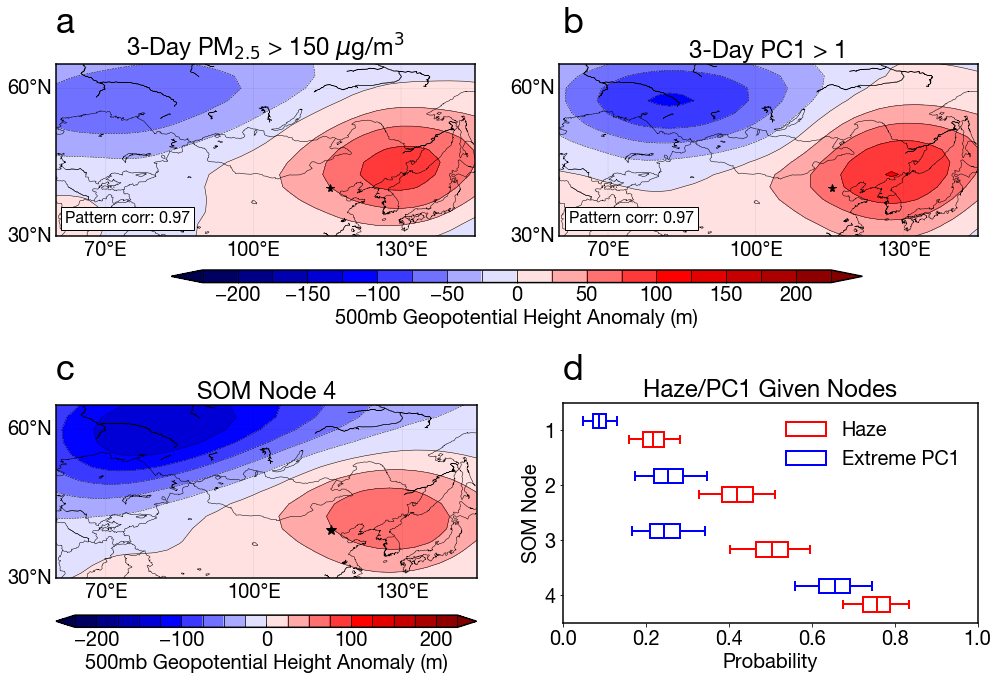

In [11]:
fig = plt.figure(figsize=(16,13))

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 20.0
rcParams["axes.linewidth"] = 1.5
rcParams['xtick.major.size'] = 8
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.size'] = 8
rcParams['ytick.major.width'] = 2



# Composites


gs2 = gridspec.GridSpec(1,2)
gs2.update(left=0.1,right=0.9,top=0.9,bottom=0.52,wspace=0.2,hspace=0.05)

for i in np.arange(0,2,1):
    
    if i == 0: # PM2.5
        ax = plt.subplot(gs2[0,0])
        composite = composite_pm25
    else:      # PC1
        composite = composite_pc1
        ax = plt.subplot(gs2[0,1])

    m = Basemap(projection="cyl",resolution="l",lat_0=latctr,llcrnrlat=latmin,urcrnrlat=latmax,lon_0=lonctr,llcrnrlon=lonmin,urcrnrlon=lonmax)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    lons, lats = m.makegrid(lonshape,latshape)
    x, y = m(lons, lats)
    parallels = np.arange(latmin,latmax+1,30)
    m.drawparallels(parallels,linewidth=0.1,labels=[True,False,False,False])
    meridians = np.arange(lonmin+10,lonmax+1,30)
    m.drawmeridians(meridians,linewidth=0.1,labels=[False,False,False,True])

    clevs = np.arange(-225,225+1,25)
    cs = m.contourf(x,y,composite,clevs,cmap="seismic",extend="both")
    cc = m.contour(x,y,composite,clevs,colors="black",linewidths=0.5)
    plot = m.plot(115.5,39.8,markersize=8,color="k",marker="*")

    if i == 0:
        plt.title("3-Day PM$_{2.5}$ > 150 "+r"$\mu$"+"g/m$^3$")
    else:
        plt.title("3-Day PC1 > 1")

cbar_ax = fig.add_axes([0.2, 0.56, 0.6, 0.03])
cbar_ax.set_aspect(0.02)
cb = fig.colorbar(cs,cax=cbar_ax,orientation="horizontal",drawedges=True)
cbar_ax.tick_params(direction="in")

cb.set_label("500mb Geopotential Height Anomaly (m)",rotation=0)



# Node 4


gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0.1,right=0.465,top=0.49,bottom=0.2,wspace=0.04,hspace=0.25)

ax = plt.subplot(gs1[0,0])

m = Basemap(projection="cyl",resolution="l",lat_0=latctr,llcrnrlat=latmin,urcrnrlat=latmax,lon_0=lonctr,llcrnrlon=lonmin,urcrnrlon=lonmax)
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
lons, lats = m.makegrid(lonshape,latshape)
x, y = m(lons, lats)
parallels = np.arange(latmin,latmax+1,30)
m.drawparallels(parallels,linewidth=0.1,labels=[True,False,False,False])
meridians = np.arange(lonmin+10,lonmax+1,30)
m.drawmeridians(meridians,linewidth=0.1,labels=[False,False,False,True])

clevs = np.arange(-225,225+1,25)
cs = m.contourf(x,y,patterns[node_to_plot-1,:,:],clevs,cmap="seismic",extend="both")
cc = m.contour(x,y,(patterns[node_to_plot-1,:,:]),clevs,colors="black",linewidths=0.5)
plot = m.plot(115.5,39.8,markersize=10,color="k",marker="*")
plt.title("SOM Node "+str(node_to_plot))

cbar_ax = fig.add_axes([0.1, 0.2, 0.365, 0.013])
#cbar_ax.set_aspect(0.02)
cb = fig.colorbar(cs,cax=cbar_ax,orientation="horizontal",drawedges=True,ticks=[-200,-100,0,100,200])
#cb.set_ticks(np.linspace(-225,225,7))
cbar_ax.tick_params(direction="in")

cb.set_label("500mb Geopotential Height Anomaly (m)",rotation=0)







# Node 4 PC1/AQ probabilities


gs3 = gridspec.GridSpec(1,1)
gs3.update(left=0.54,right=0.9,top=0.44,bottom=0.205,wspace=0.04,hspace=0.25)

ax = plt.subplot(gs3[0,0])

#pos_aq = [[1,2,3,4],
#          [6,7,8,9]]

#aq_names = ["100 "+r"$\mu$"+"g/m$^3$","150 "+r"$\mu$"+"g/m$^3$"]
#aq_names = ["100","150"]

#textpos_aq = [1.75,6.75]
#textpos_aq = [0.5,5.5]

prob = som_aq_probs[1,:,:].values
b1 = plt.boxplot([prob[3,:],prob[2,:],prob[1,:],prob[0,:]],widths=0.8,vert=False,sym="",positions=[1,4,7,10],patch_artist=True,whis=[5,95]) #,labels=["1","2","3","4"],positions=pos_aq[i])
b2 = plt.boxplot([som_pc1_probs[3,:].values,som_pc1_probs[2,:].values,som_pc1_probs[1,:].values,som_pc1_probs[0,:].values],widths=0.8,vert=False,sym="",positions=[2,5,8,11],patch_artist=True,whis=[5,95])
#labels=["1","2","3","4"],positions=[1,2,3,4])

set_boxplot_col(b1,4,"red",2,True)
set_boxplot_col(b2,4,"blue",2,True)

for patch in b1["boxes"]:
    patch.set(facecolor="white")
for patch in b2["boxes"]:
    patch.set(facecolor="white")
                 
plt.ylim([0,12])
plt.xlim([0,1])
plt.yticks(ticks=[1.5,4.5,7.5,10.5],labels=["4","3","2","1"])
plt.ylabel("SOM Node")
plt.xlabel("Probability")
#plt.ylabel("P of 100 "+r"$\mu$"+"g/m$^3$ "+str(rm)+"-Day Mean")

ax.legend([b1["boxes"][0],b2["boxes"][0]],["Haze","Extreme PC1"], loc="upper right",frameon=False,ncol=1)
                 
plt.title("Haze/PC1 Given Nodes")
#plt.yticks([])



plt.figtext(0.1,0.835,"a",fontsize=35)
plt.figtext(0.54,0.835,"b",fontsize=35)
plt.figtext(0.1,0.465,"c",fontsize=35)
plt.figtext(0.54,0.465,"d",fontsize=35)


t1 = plt.figtext(0.108,0.632,"Pattern corr: "+str(np.around(patcor,2)),fontsize=16)
t1.set_bbox(dict(facecolor="white", alpha=1, edgecolor="black"))

t2 = plt.figtext(0.545,0.632,"Pattern corr: "+str(np.around(patcor,2)),fontsize=16)
t2.set_bbox(dict(facecolor="white", alpha=1, edgecolor="black"))


plt.savefig("../Figures/Figure1.pdf")
plt.show()